##### Import relevant libraries

In [1]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

import warnings

warnings.filterwarnings('ignore')


In [3]:
# import Preprocessing_visualization notebook as module

import import_ipynb

from Preprocessing_visualization import total_trips_redefine

from Preprocessing_visualization import merged_stations_trips

In [4]:
## Read San Francisco Weather File

weather_sf = pd.read_csv('2176372.csv', header='infer')

In [5]:
weather_sf.head(1)

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,TStorms,WindEquipmentChangeDate
0,99999923272,2013-08-25T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,534.0,1849.0,NaN,NaN


In [6]:
# check for duplicates on DATE

weather_sf['DATE_'] =pd.to_datetime(weather_sf['DATE'])
weather_sf['DATE_']=weather_sf['DATE_'].dt.strftime("%Y/%m/%d")

weather_sf.duplicated(subset='DATE_').value_counts()

False    735
True     551
dtype: int64

In [7]:
weather_sf.columns

Index(['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'AWND', 'BackupDirection',
       'BackupDistance', 'BackupDistanceUnit', 'BackupElements',
       'BackupElevation',
       ...
       'ShortDurationPrecipitationValue080',
       'ShortDurationPrecipitationValue100',
       'ShortDurationPrecipitationValue120',
       'ShortDurationPrecipitationValue150',
       'ShortDurationPrecipitationValue180', 'Sunrise', 'Sunset', 'TStorms',
       'WindEquipmentChangeDate', 'DATE_'],
      dtype='object', length=125)

In [8]:
# select potentially relevant columns

weather=weather_sf[['DailyDepartureFromNormalAverageTemperature', 'DailyPrecipitation','STATION','DATE','DailyAverageDewPointTemperature',
'DailyAverageDryBulbTemperature', 'DailyAverageWindSpeed','Sunrise','Sunset','TStorms','DATE_']].copy()


In [9]:
weather.head(1)

,DailyDepartureFromNormalAverageTemperature,DailyPrecipitation,STATION,DATE,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageWindSpeed,Sunrise,Sunset,TStorms,DATE_
0,2.9,0.0,99999923272,2013-08-25T23:59:00,NaN,65.0,NaN,534.0,1849.0,NaN,2013/08/25


In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 11 columns):
DailyDepartureFromNormalAverageTemperature    735 non-null float64
DailyPrecipitation                            735 non-null float64
STATION                                       1286 non-null int64
DATE                                          1286 non-null object
DailyAverageDewPointTemperature               0 non-null float64
DailyAverageDryBulbTemperature                735 non-null float64
DailyAverageWindSpeed                         0 non-null float64
Sunrise                                       735 non-null float64
Sunset                                        735 non-null float64
TStorms                                       0 non-null float64
DATE_                                         1286 non-null object
dtypes: float64(8), int64(1), object(2)
memory usage: 110.6+ KB


In [11]:
weather.drop_duplicates(subset='DATE_',keep='last', inplace=True)

weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 1285
Data columns (total 11 columns):
DailyDepartureFromNormalAverageTemperature    712 non-null float64
DailyPrecipitation                            712 non-null float64
STATION                                       735 non-null int64
DATE                                          735 non-null object
DailyAverageDewPointTemperature               0 non-null float64
DailyAverageDryBulbTemperature                712 non-null float64
DailyAverageWindSpeed                         0 non-null float64
Sunrise                                       712 non-null float64
Sunset                                        712 non-null float64
TStorms                                       0 non-null float64
DATE_                                         735 non-null object
dtypes: float64(8), int64(1), object(2)
memory usage: 68.9+ KB


In [12]:
### Define a new dataframe

weather_SF = weather

In [13]:
## Variables to consider

# interpolate to complete missing values

weather_SF['DailyAverageDryBulbTemperature']=weather['DailyAverageDryBulbTemperature'].interpolate(method='linear')
weather_SF['DailyPrecipitation']=weather['DailyPrecipitation'].interpolate(method='linear')
weather_SF['Sunrise']=weather['Sunrise'].interpolate(method='linear')
weather_SF['Sunset']=weather['Sunset'].interpolate(method='linear')

In [14]:
weather_SF= weather_SF[['DATE','DailyAverageDryBulbTemperature','DailyPrecipitation','Sunrise','Sunset']].copy()

In [15]:
weather_SF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 1285
Data columns (total 5 columns):
DATE                              735 non-null object
DailyAverageDryBulbTemperature    735 non-null float64
DailyPrecipitation                735 non-null float64
Sunrise                           735 non-null float64
Sunset                            735 non-null float64
dtypes: float64(4), object(1)
memory usage: 34.5+ KB


In [16]:
# convert data to pandas datetime object

weather_SF['DATE']=pd.to_datetime(weather_SF['DATE']).dt.strftime("%Y/%m/%d")

In [17]:
# get dataframe with merged data for total trips over the week/ weekend

merge_WD, merge_WE = merged_stations_trips()

In [18]:
# select only SAN FRANCISCO trips, Weekday

In [19]:
merged_WD_SF = merge_WD[merge_WD['city']== 'San Francisco']

In [20]:
merged_WD_SF.head(1) # weekday for san francisco

,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,...,Hour,year,Duration_Minutes,id_y,name,lat,long,dock_count,city,installation_date
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,...,14,2013,1.05,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013


In [21]:
merged_WD_SF['date']=merged_WD_SF['start_date'].dt.strftime("%Y/%m/%d")

In [22]:
merged_WD_SF_grouped = merged_WD_SF.groupby(['date']).agg(Number_Trips=('subscription_type','value_counts'))

In [23]:
merged_WD_SF_grouped.reset_index(inplace=True) # number of started trips per day in San Francisco

In [24]:
weather_merged_WD_SF = pd.merge(merged_WD_SF_grouped, weather_SF, left_on='date', right_on='DATE', how='inner')

In [25]:
weather_merged_WD_SF.drop(columns=['Sunrise','Sunset'],inplace=True)

In [26]:
weather_merged_WD_SF.drop(columns=['date'],inplace=True)

In [27]:
weather_merged_WD_SF.head(2)

,subscription_type,Number_Trips,DATE,DailyAverageDryBulbTemperature,DailyPrecipitation
0,Subscriber,382,2013/08/29,65.0,0.0
1,Customer,243,2013/08/29,65.0,0.0


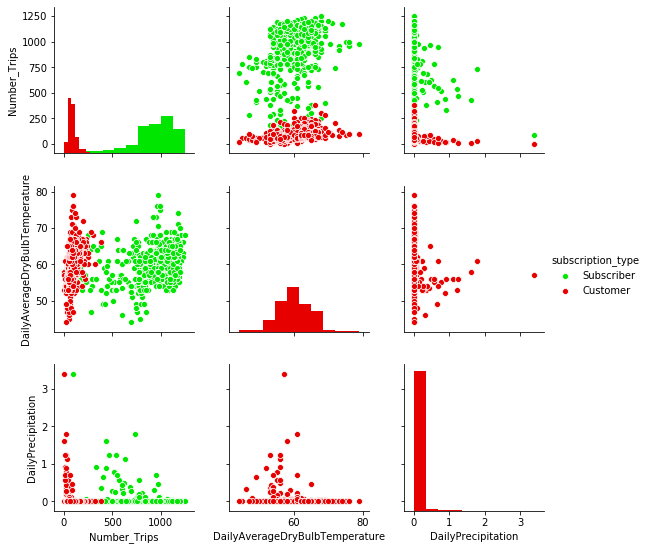

In [28]:
# visualization for San Francisco -- weekday

sns.pairplot(weather_merged_WD_SF,hue='subscription_type', diag_kind='hist',palette={'Customer':(0.9, 0.0, 0.0), 'Subscriber':(0.0, 0.9, 0.0)})

plt.savefig('weather_impact_week.png')
plt.show()


In [29]:
## Build Weekend series for San Francisco

merged_WE_SF = merge_WE[merge_WE['city']== 'San Francisco']

merged_WE_SF['date']=merged_WE_SF['start_date'].dt.strftime("%Y/%m/%d")

merged_WE_SF_grouped = merged_WE_SF.groupby(['date']).agg(Number_Trips=('subscription_type','value_counts'))

merged_WE_SF_grouped.reset_index(inplace=True) # number of started trips per day in San Francisco

weather_merged_WE_SF = pd.merge(merged_WE_SF_grouped, weather_SF, left_on='date', right_on='DATE', how='inner')

weather_merged_WE_SF.drop(columns=['Sunrise','Sunset','date'],inplace=True)

In [30]:
weather_merged_WE_SF.head(2)

,subscription_type,Number_Trips,DATE,DailyAverageDryBulbTemperature,DailyPrecipitation
0,Customer,344,2013/08/31,65.0,0.0
1,Subscriber,126,2013/08/31,65.0,0.0


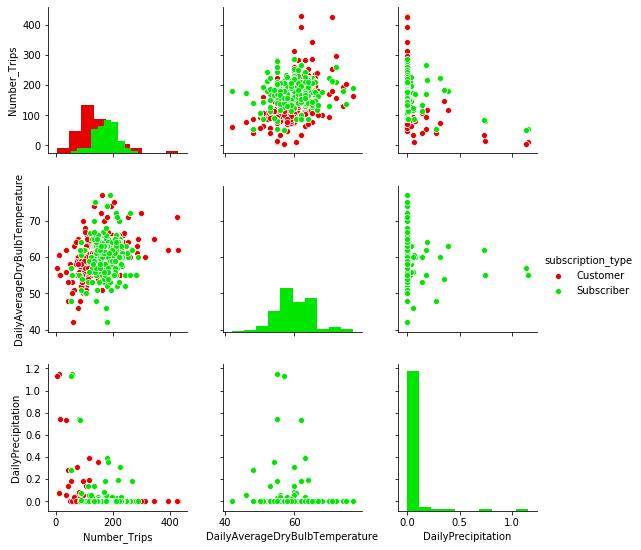

In [32]:
# Visualization for San Francisco -- weekend

sns.pairplot(weather_merged_WE_SF,hue='subscription_type', diag_kind='hist', palette={'Customer':(0.9, 0.0, 0.0), 'Subscriber':(0.0, 0.9, 0.0)})

plt.savefig('weather_impact_weekend.png')
plt.show()


###### Compare two extreme months, December and June

In [35]:
# Diciembre 2013, customer vs Subscriber, weekday vs weekend

a, total_trips_capped_WD , total_trips_capped_WE = total_trips_redefine()

total_trips_capped_WD_Dec= total_trips_capped_WD[(total_trips_capped_WD['Month']==12)&(total_trips_capped_WD['year']==2013)]

total_trips_capped_WE_Dec= total_trips_capped_WE[(total_trips_capped_WE['Month']==12)&(total_trips_capped_WE['year']==2013)]

# group trips by hour

total_trips_capped_WD_Dec_H = total_trips_capped_WD_Dec.groupby(['Hour']).agg(Number_Trips=('subscription_type','value_counts'))

total_trips_capped_WD_Dec_H.reset_index(inplace=True)

total_trips_capped_WE_Dec_H = total_trips_capped_WE_Dec.groupby(['Hour']).agg(Number_Trips=('subscription_type','value_counts'))

total_trips_capped_WE_Dec_H.reset_index(inplace=True)

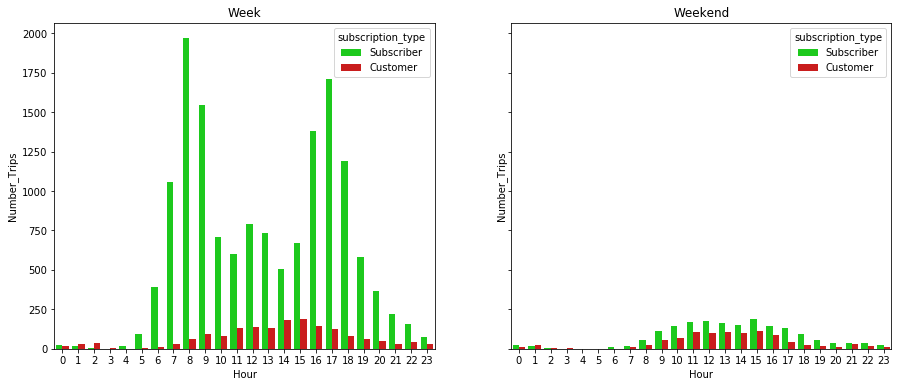

In [36]:
## Visualization of activity per hour during December 2013, week vs weekend, customer vs subscriber

palette={'Customer':(0.9, 0.0, 0.0), 'Subscriber':(0.0, 0.9, 0.0)}

fig, ax = plt.subplots(1,2, sharey=True, figsize=[15,6])

sns.barplot(x='Hour', y='Number_Trips', hue='subscription_type',data=total_trips_capped_WD_Dec_H,palette=palette, ax=ax[0])
sns.barplot(x='Hour', y='Number_Trips', hue='subscription_type',data=total_trips_capped_WE_Dec_H,palette=palette, ax=ax[1])
ax[0].set_title('Week')
ax[1].set_title('Weekend')
plt.savefig('December_weather.png')
plt.show()


In [37]:
# June 2014, customer vs Subscriber, weekday vs weekend

total_trips_capped_WD_Jun= total_trips_capped_WD[(total_trips_capped_WD['Month']==6)&(total_trips_capped_WD['year']==2014)]

total_trips_capped_WE_Jun= total_trips_capped_WE[(total_trips_capped_WE['Month']==6)&(total_trips_capped_WE['year']==2014)]

# group trips by hour

total_trips_capped_WD_Jun_H = total_trips_capped_WD_Jun.groupby(['Hour']).agg(Number_Trips=('subscription_type','value_counts'))

total_trips_capped_WD_Jun_H.reset_index(inplace=True)

total_trips_capped_WE_Jun_H = total_trips_capped_WE_Jun.groupby(['Hour']).agg(Number_Trips=('subscription_type','value_counts'))

total_trips_capped_WE_Jun_H.reset_index(inplace=True)


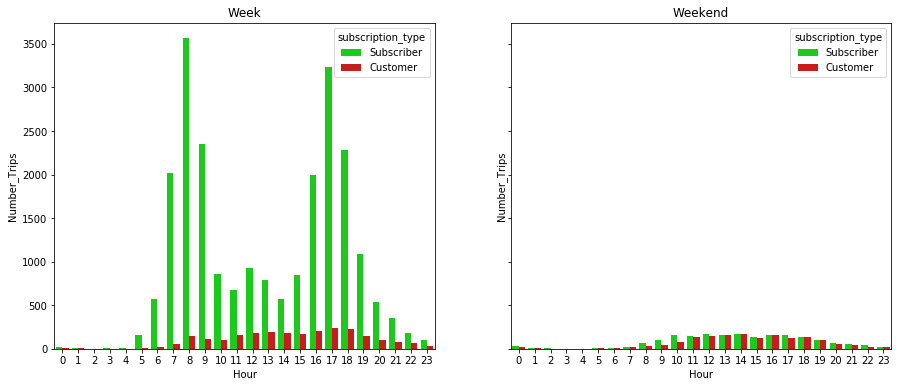

In [39]:
## Visualization of activity per hour during June 2014, week vs weekend, customer vs subscriber

palette={'Customer':(0.9, 0.0, 0.0), 'Subscriber':(0.0, 0.9, 0.0)}

fig, ax = plt.subplots(1,2, sharey=True, figsize=[15,6])

sns.barplot(x='Hour', y='Number_Trips', hue='subscription_type',data=total_trips_capped_WD_Jun_H,palette=palette, ax=ax[0])
sns.barplot(x='Hour', y='Number_Trips', hue='subscription_type',data=total_trips_capped_WE_Jun_H,palette=palette, ax=ax[1])
ax[0].set_title('Week')
ax[1].set_title('Weekend')
plt.savefig('June_weather.png')
plt.show()
